In [1]:
import pandas as pd

In [19]:
from sklearn import set_config

set_config(transform_output='pandas')

In [7]:
url = "https://drive.google.com/file/d/1Q-ZWt5qisXK8fKy3evhGTH3DVRuS-Rla/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
songs = pd.read_csv(path)

In [3]:
songs

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,My Band,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
1,The Real Slim Shady,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
2,Águas De Março,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
3,The Girl From Ipanema,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
4,"Paint It, Black",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
5,Sultans Of Swing,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
6,Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
7,In Silence,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,0.0710,61.494,268427,4,7n92QzQomRCLlciO14X0kd,https://open.spotify.com/track/7n92QzQomRCLlci...


In [5]:
songs.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'id', 'html'],
      dtype='object')

In [8]:
songs = songs.set_index(['song_name','artist'])
songs = songs.drop(['id','html'],axis=1)

In [9]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10 entries, ('My Band', 'D12') to ('Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1', 'Frédéric Chopin')
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      10 non-null     float64
 1   energy            10 non-null     float64
 2   key               10 non-null     int64  
 3   loudness          10 non-null     float64
 4   mode              10 non-null     int64  
 5   speechiness       10 non-null     float64
 6   acousticness      10 non-null     float64
 7   instrumentalness  10 non-null     float64
 8   liveness          10 non-null     float64
 9   valence           10 non-null     float64
 10  tempo             10 non-null     float64
 11  duration_ms       10 non-null     int64  
 12  time_signature    10 non-null     int64  
dtypes: float64(9), int64(4)
memory usage: 1.9+ KB


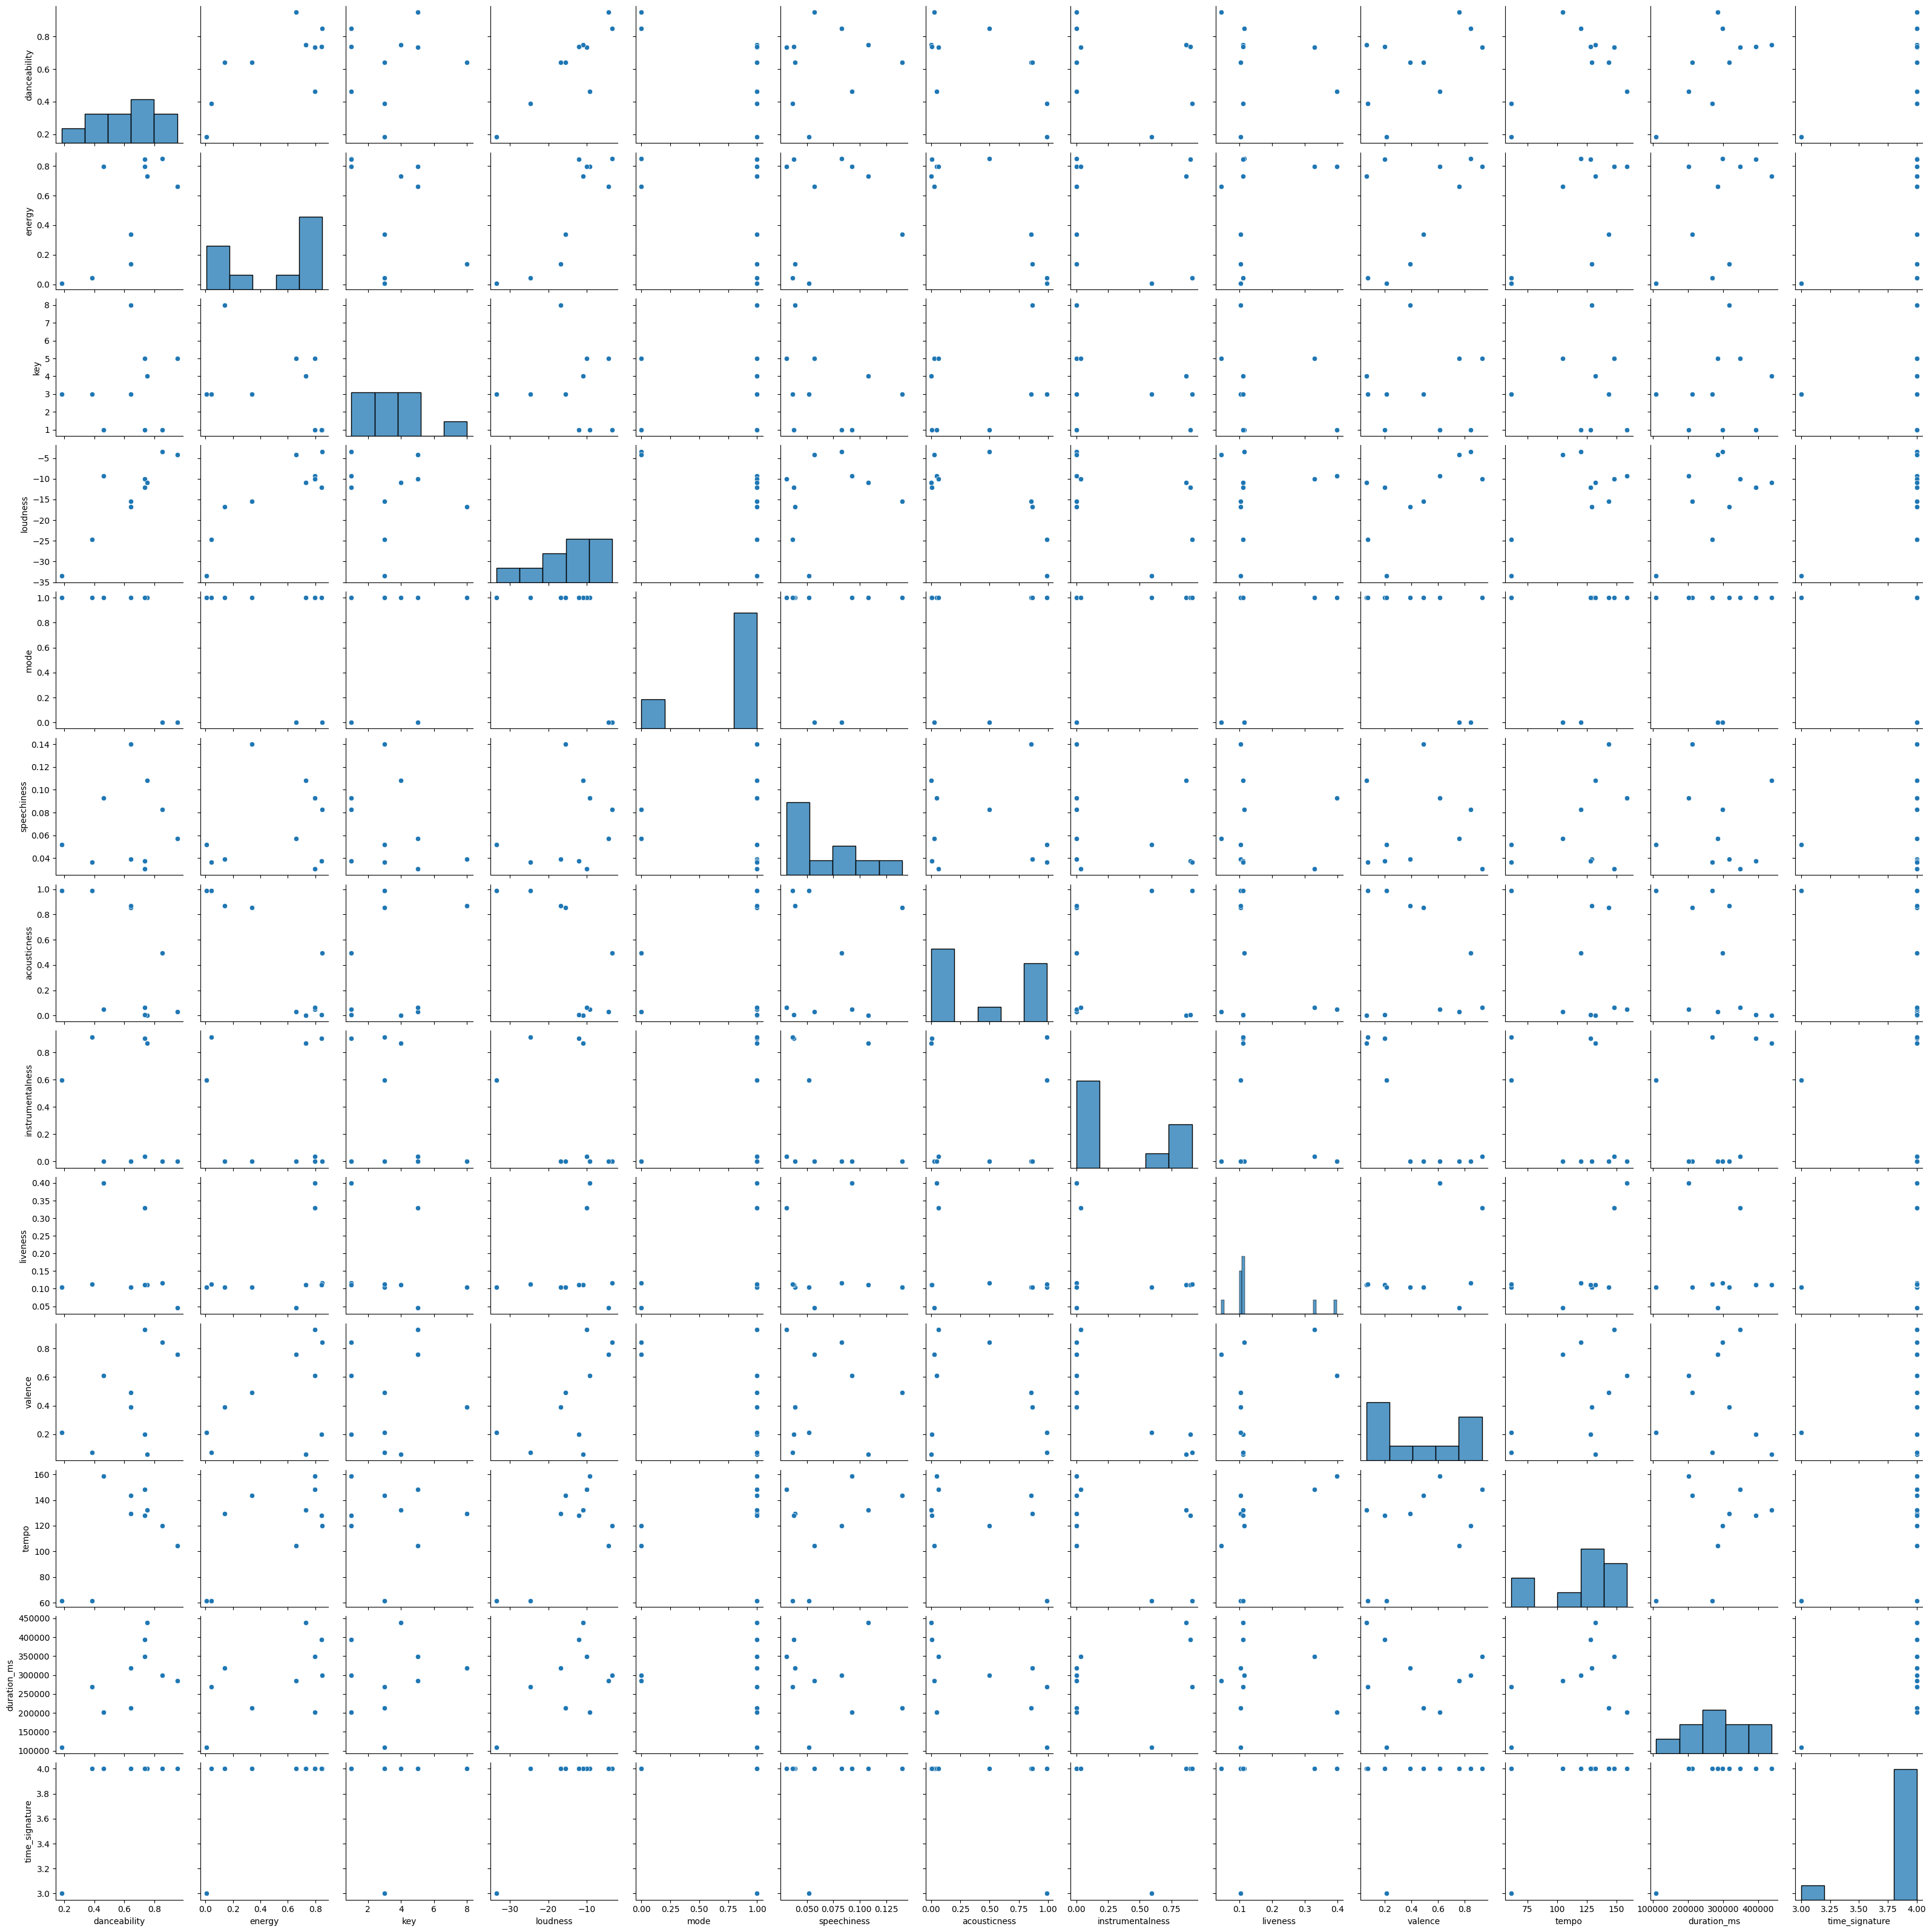

In [10]:
import seaborn as sns

sns.pairplot(songs)

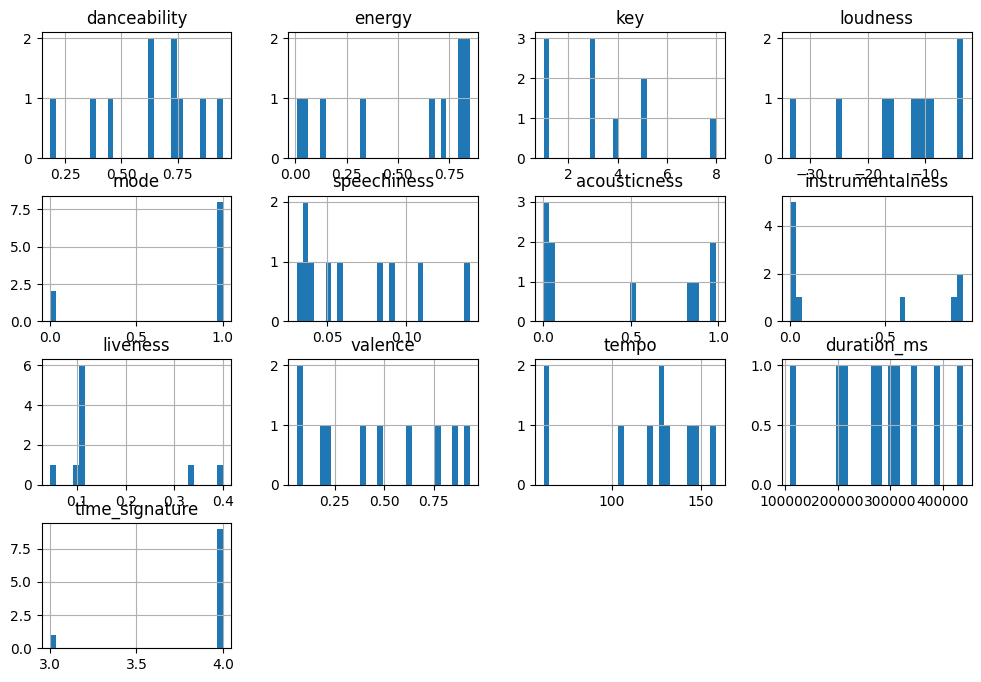

In [12]:
(songs.hist(bins=30, figsize=(12, 8)));

In [13]:
from sklearn.metrics import pairwise_distances

songs_dist_array = pairwise_distances(songs)
songs_dist = pd.DataFrame(songs_dist_array,columns=songs.index,index=songs.index)

<Axes: xlabel='song_name-artist', ylabel='song_name-artist'>

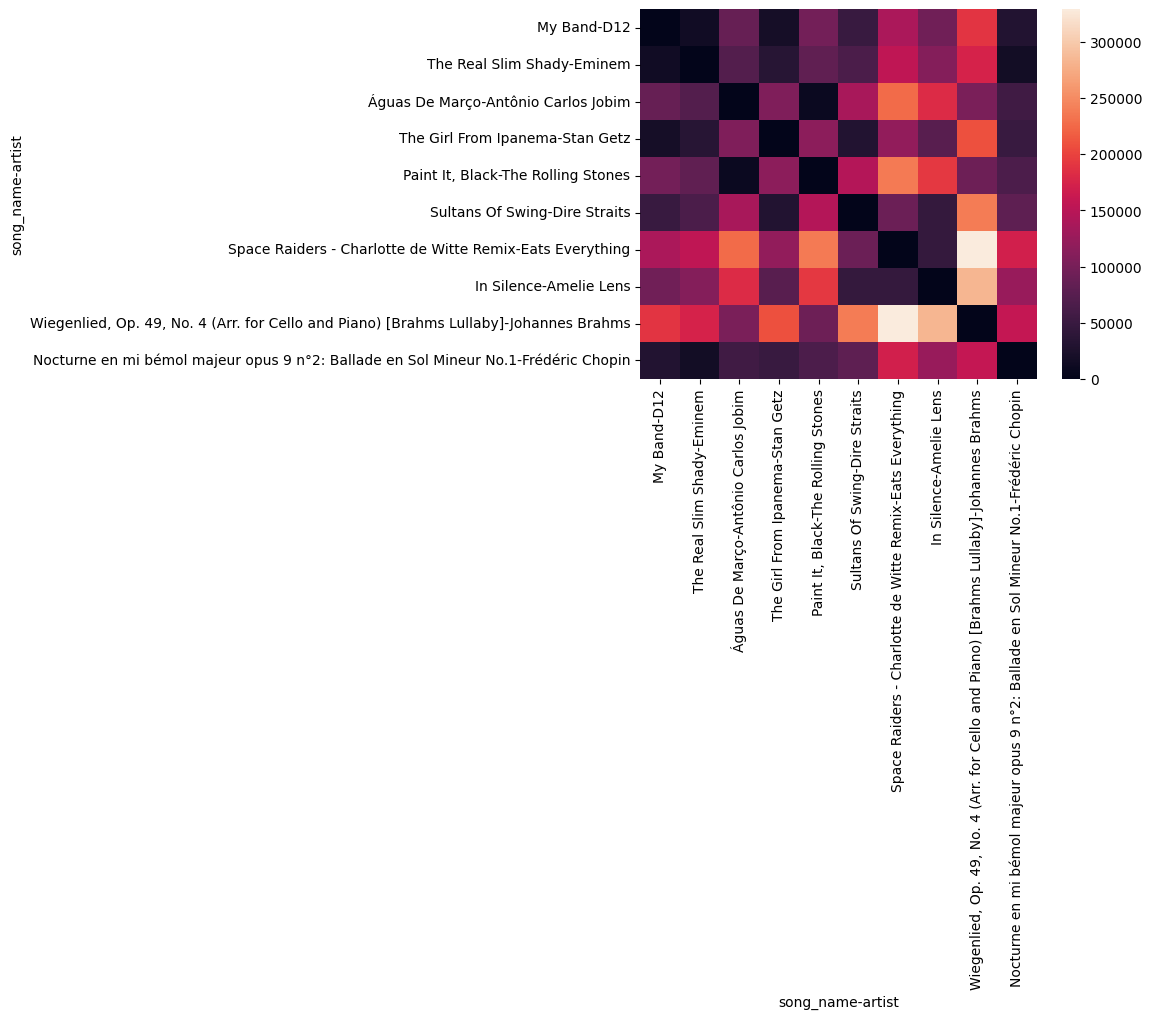

In [16]:
sns.heatmap(songs_dist)

In [17]:
songs.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.633600,0.520743,3.400000,-14.029300,0.800000,0.067630,0.434652,0.331780,0.153840,0.456580,118.716000,287493.800000,3.900000
std,0.229072,0.348562,2.221111,9.217901,0.421637,0.036715,0.447731,0.428544,0.114019,0.321551,33.661904,96496.252263,0.316228
min,0.184000,0.008330,1.000000,-33.503000,0.000000,0.030700,0.003140,0.000000,0.045400,0.059800,61.494000,109800.000000,3.000000
25%,0.508250,0.189750,1.500000,-16.468250,1.000000,0.038025,0.034975,0.000417,0.105000,0.201250,108.381500,226406.750000,4.000000
50%,0.687500,0.696000,3.000000,-11.441000,1.000000,0.054550,0.279200,0.019570,0.111000,0.439500,128.663500,291486.500000,4.000000
75%,0.745750,0.794750,4.750000,-9.456000,1.000000,0.090150,0.863750,0.799250,0.115000,0.723000,140.562750,340964.750000,4.000000
max,0.949000,0.849000,8.000000,-3.383000,1.000000,0.140000,0.990000,0.913000,0.399000,0.931000,158.691000,438720.000000,4.000000


In [24]:
from sklearn.preprocessing import MinMaxScaler

my_scaler = MinMaxScaler(feature_range=(0,1)) # 1. initialize
my_scaler.fit(songs) # 2. learning
songs_scaled = my_scaler.transform(songs) # 3. transforming

songs_scaled.head(3)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_name,artist,,,,,,,,,,,,,
My Band,D12,0.871895,1.000000,0.000000,1.000000,0.0,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0.574526,1.0
The Real Slim Shady,Eminem,1.000000,0.776369,0.571429,0.971414,0.0,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0.530220,1.0
Águas De Março,Antônio Carlos Jobim,0.598693,0.393341,0.285714,0.597610,1.0,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,0.311930,1.0


In [25]:
songs_scaled_dist_array = pairwise_distances(songs_scaled)
songs_dist_scaled = pd.DataFrame(songs_scaled_dist_array,columns=songs_scaled.index,index=songs_scaled.index)

<Axes: xlabel='song_name-artist', ylabel='song_name-artist'>

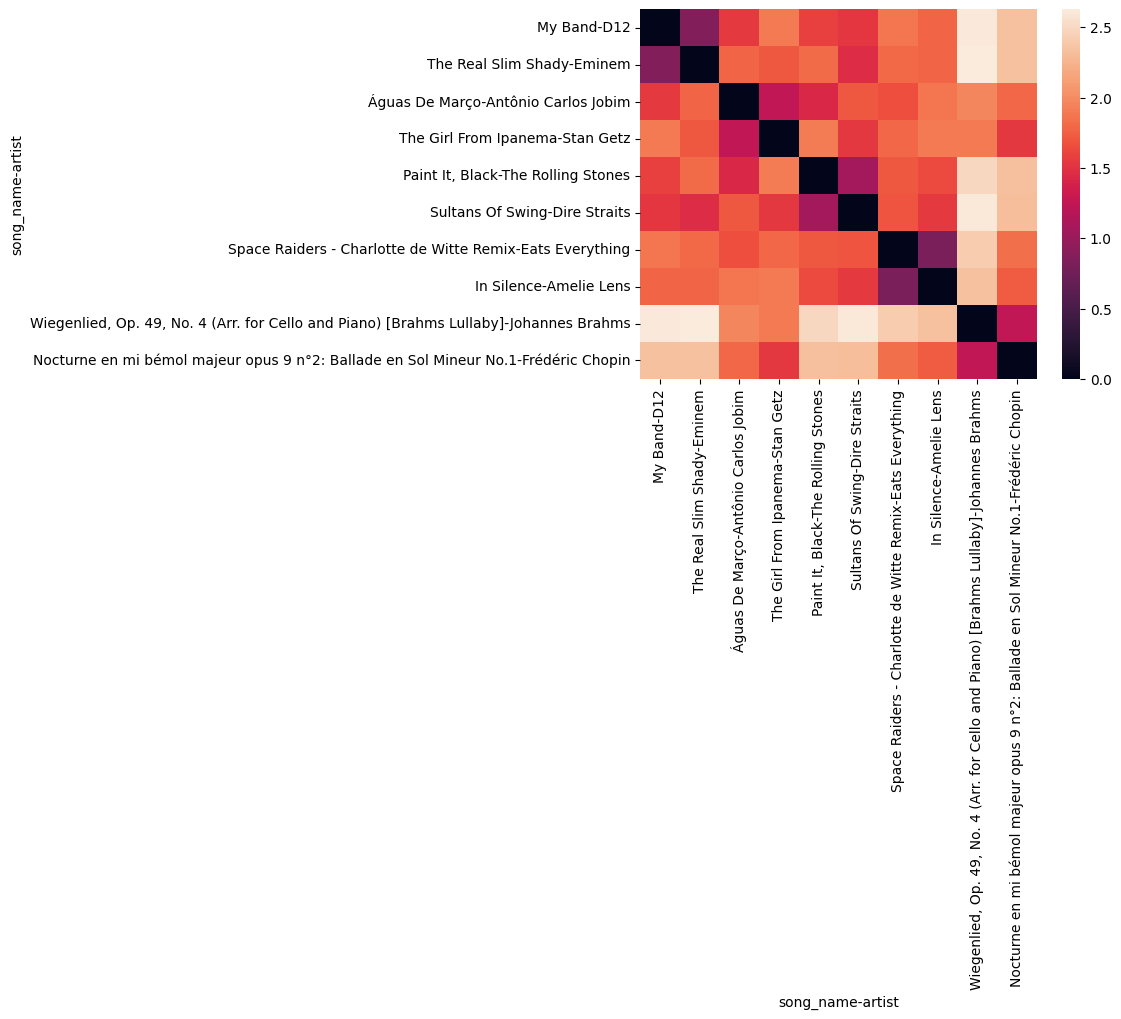

In [26]:
sns.heatmap(songs_dist_scaled)

In [35]:
url = "https://drive.google.com/file/d/1Q-ZWt5qisXK8fKy3evhGTH3DVRuS-Rla/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
songs_test = pd.read_csv(path)

In [36]:
songs_test = songs_test.set_index(['song_name','artist'])
songs_test = songs_test.drop(['id','html'],axis=1)

In [31]:
songs_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10 entries, ('My Band', 'D12') to ('Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1', 'Frédéric Chopin')
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      10 non-null     float64
 1   energy            10 non-null     float64
 2   key               10 non-null     int64  
 3   loudness          10 non-null     float64
 4   mode              10 non-null     int64  
 5   speechiness       10 non-null     float64
 6   acousticness      10 non-null     float64
 7   instrumentalness  10 non-null     float64
 8   liveness          10 non-null     float64
 9   valence           10 non-null     float64
 10  tempo             10 non-null     float64
 11  duration_ms       10 non-null     int64  
 12  time_signature    10 non-null     int64  
dtypes: float64(9), int64(4)
memory usage: 1.9+ KB


In [37]:
songs_test = songs_test.drop(['mode','key','duration_ms','time_signature','tempo','loudness'],axis=1)

In [38]:
songs_test_dist_array = pairwise_distances(songs_test)
songs_test_dist = pd.DataFrame(songs_test_dist_array,columns=songs_test.index,index=songs_test.index)

<Axes: xlabel='song_name-artist', ylabel='song_name-artist'>

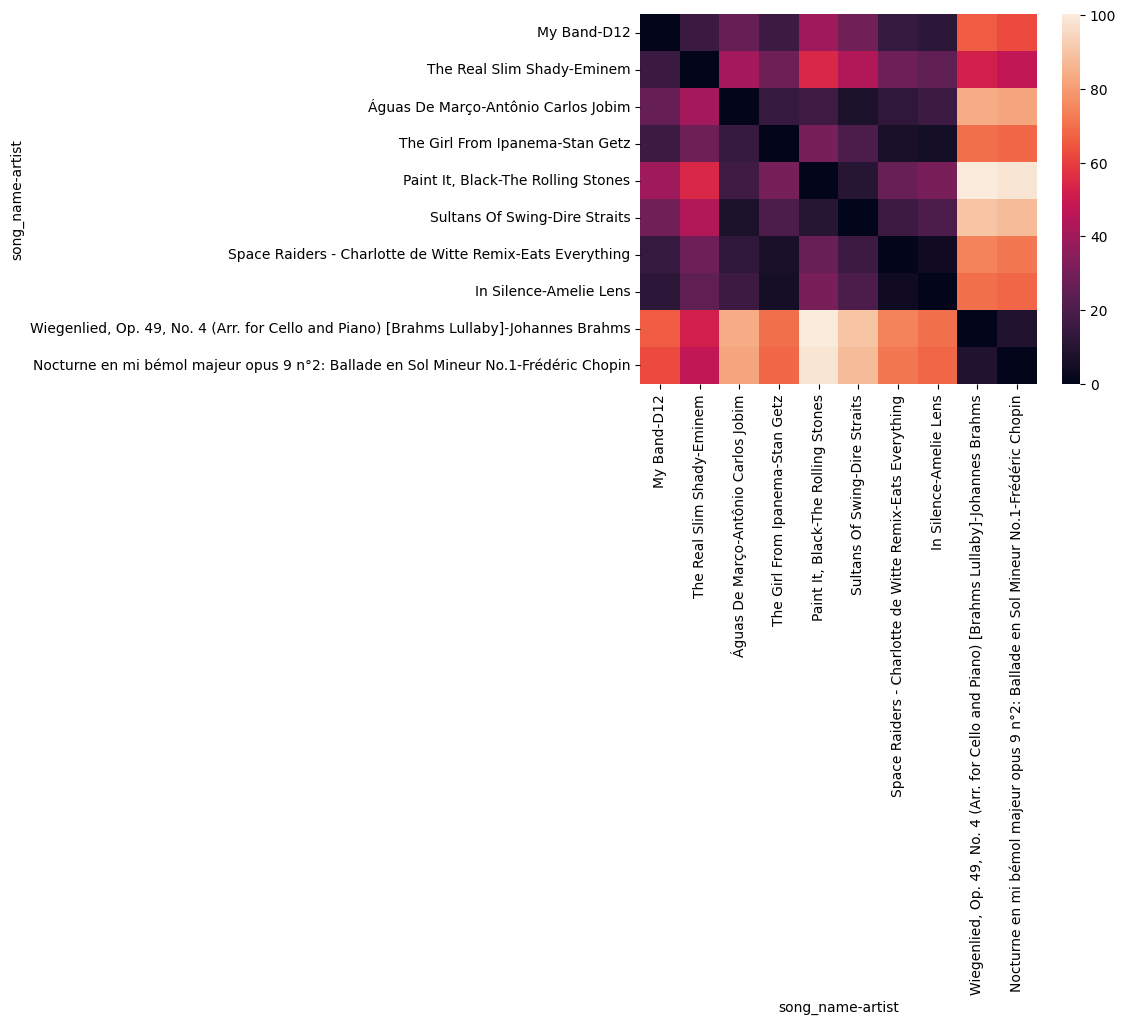

In [34]:
sns.heatmap(songs_test_dist)

<Axes: xlabel='song_name-artist', ylabel='song_name-artist'>

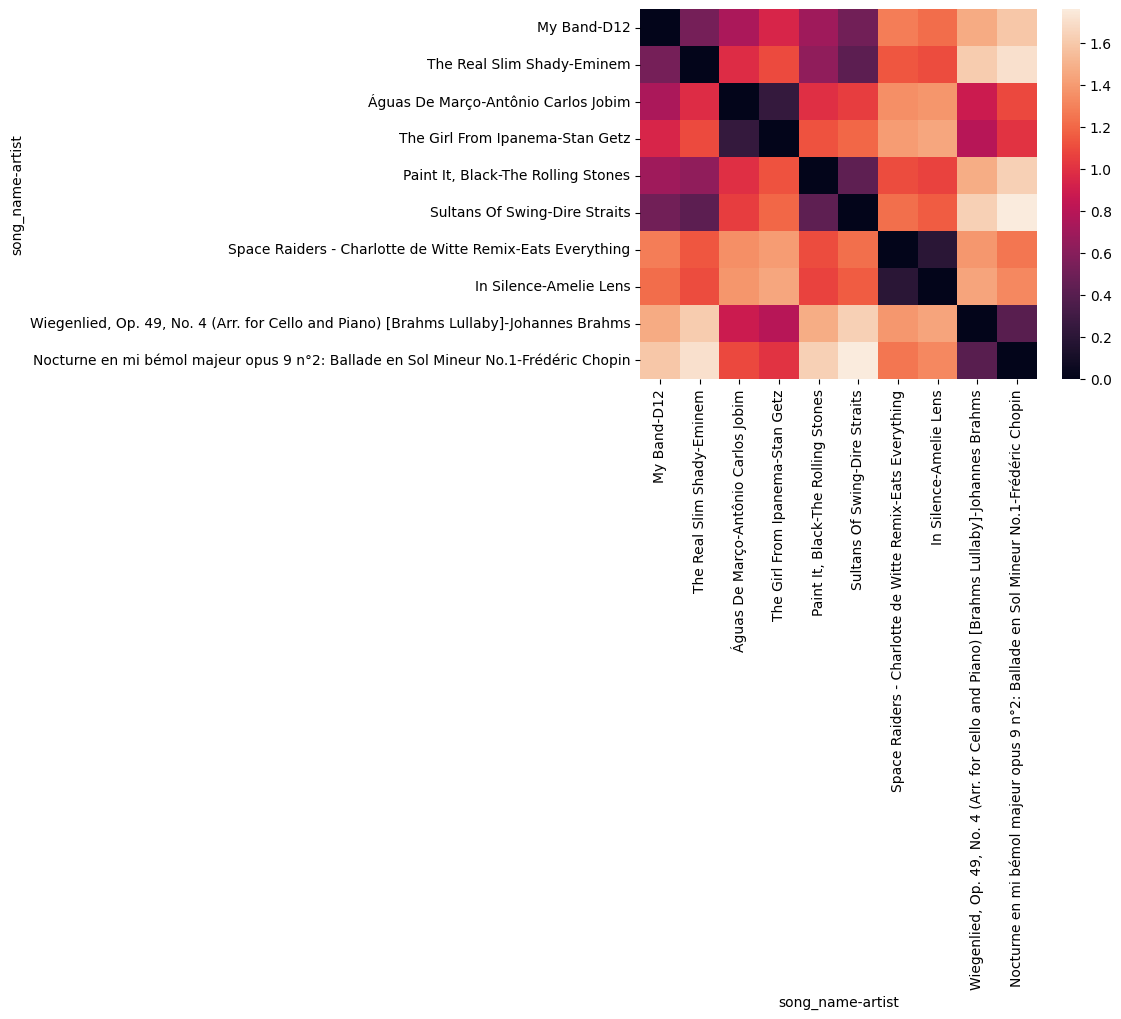

In [39]:
sns.heatmap(songs_test_dist)